# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress
from datetime import date


from api_keys import weather_api_key
import function  as func

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Create a variable for the Output File (CSV)
imp_output_data_file = "Output/cities.csv"



# Define the Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
todaysdate = time.strftime("%d/%m/%Y")

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each latitude, longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# Define the variables to be used in the request query
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Create the Lists to be used in the Dictionary for the Data Frame
namecity = []
cloud = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []



counter = 0


# Loop through the entire list of cities and request data for each city

# for city in my_cities:
for city in cities:
    try:
        API_response = requests.get(query_url + city).json()
        namecity.append(API_response['name'])
        cloud.append(API_response['clouds']['all'])
        country.append(API_response['sys']['country'])
        date.append(API_response['dt'])
        humidity.append(API_response['main']['humidity'])
        lat.append(API_response['coord']['lat'])
        lng.append(API_response['coord']['lon'])
        maxtemp.append(API_response['main']['temp_max'])
        windspeed.append(API_response['wind']['speed'])
        counter += 1
        print(f"Processing Request {counter} | {city}")
    except Exception:
        print(f"City not found -- Skipping: {city}")


       

Processing Request 1 | panacan
Processing Request 2 | cape town
Processing Request 3 | marystown
Processing Request 4 | poum
City not found -- Skipping: barentsburg
Processing Request 5 | rikitea
Processing Request 6 | manyana
Processing Request 7 | vaitape
City not found -- Skipping: taolanaro
Processing Request 8 | kapaa
Processing Request 9 | jamestown
Processing Request 10 | cap malheureux
Processing Request 11 | marana
Processing Request 12 | vila velha
Processing Request 13 | port alfred
Processing Request 14 | nanortalik
Processing Request 15 | half moon bay
Processing Request 16 | chokurdakh
Processing Request 17 | laramie
City not found -- Skipping: hihifo
Processing Request 18 | chicama
Processing Request 19 | namibe
Processing Request 20 | atuona
Processing Request 21 | busselton
Processing Request 22 | hofn
Processing Request 23 | barrow
Processing Request 24 | acapulco
Processing Request 25 | perevoz
Processing Request 26 | yellowknife
Processing Request 27 | norman wells


Processing Request 225 | lander
Processing Request 226 | hambantota
Processing Request 227 | teya
Processing Request 228 | bontang
Processing Request 229 | bamiantong
Processing Request 230 | tiksi
Processing Request 231 | udachnyy
Processing Request 232 | asfi
Processing Request 233 | sambava
City not found -- Skipping: longlac
City not found -- Skipping: carikar
Processing Request 234 | torbay
Processing Request 235 | guarapari
Processing Request 236 | hailey
Processing Request 237 | college
Processing Request 238 | mabaruma
Processing Request 239 | anshun
Processing Request 240 | jinchang
Processing Request 241 | srednekolymsk
Processing Request 242 | butaritari
Processing Request 243 | bambous virieux
Processing Request 244 | doha
Processing Request 245 | belyy yar
Processing Request 246 | marawi
Processing Request 247 | mayumba
Processing Request 248 | dongsheng
City not found -- Skipping: aflu
Processing Request 249 | kahului
Processing Request 250 | takahata
City not found -- Sk

Processing Request 440 | razgrad
Processing Request 441 | hulan
City not found -- Skipping: mrirt
Processing Request 442 | zenzeli
Processing Request 443 | meulaboh
Processing Request 444 | saldanha
Processing Request 445 | ulundi
Processing Request 446 | koungheul
Processing Request 447 | sitka
Processing Request 448 | xuddur
City not found -- Skipping: cruden bay
Processing Request 449 | anadyr
Processing Request 450 | takoradi
Processing Request 451 | vostok
City not found -- Skipping: marcona
Processing Request 452 | ulladulla
Processing Request 453 | aleksinac
City not found -- Skipping: bur gabo
Processing Request 454 | la tuque
Processing Request 455 | dakar
Processing Request 456 | prachuap khiri khan
Processing Request 457 | kasongo-lunda
Processing Request 458 | ouadda
Processing Request 459 | marsh harbour
Processing Request 460 | salalah
Processing Request 461 | algeciras
Processing Request 462 | manuk mangkaw
Processing Request 463 | amapa
Processing Request 464 | itoman
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df_citites=pd.DataFrame({"city" : namecity,
                         "cloud" : cloud,
                         "country" : country,
                         "date": date,
                         "humidity":humidity ,
                         "lat":lat , 
                         "lng":lng , 
                         "maxtemp":maxtemp , 
                         "windspeed":windspeed , 
                        })
df_citites.to_csv(r'C:\Users\mansoureh.izadi\Desktop\New folder\CityWethear.csv', index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

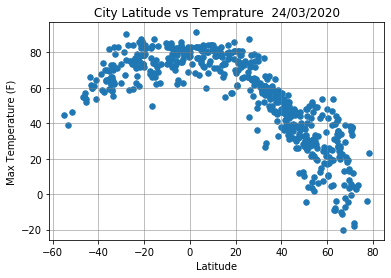

In [5]:

title = "City Latitude vs Temprature" + "  "+ todaysdate
ax = df_citites.plot.scatter(x='lat',
                      y='maxtemp',s=30,title=title)
ax.set_ylabel("Max Temperature (F)")
ax.set_xlabel("Latitude")

ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

#### Latitude vs. Humidity Plot

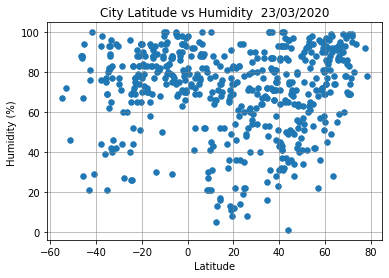

In [6]:

title = "City Latitude vs Humidity" + "  "+ todaysdate
ax = df_citites.plot.scatter(x='lat',
                      y='humidity',s=30,title=title)
ax.set_ylabel("Humidity (%) ")
ax.set_xlabel("Latitude")

ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

#### Latitude vs. Cloudiness Plot

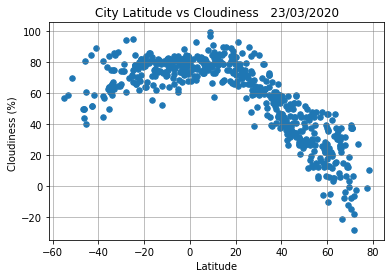

In [7]:

title = "City Latitude vs Cloudiness " + "  "+ todaysdate
ax = df_citites.plot.scatter(x='lat',
                      y='maxtemp',s=30,title=title)
ax.set_ylabel("Cloudiness (%) ")
ax.set_xlabel("Latitude")

ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

#### Latitude vs. Wind Speed Plot

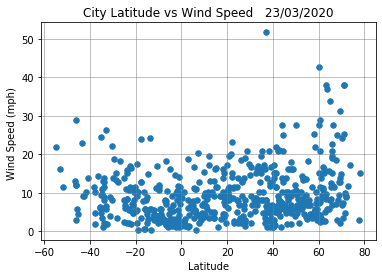

In [8]:
title = "City Latitude vs Wind Speed " + "  "+ todaysdate
ax = df_citites.plot.scatter(x='lat',
                      y='windspeed',s=30,title=title)
ax.set_ylabel("Wind Speed (mph) ")
ax.set_xlabel("Latitude")

ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames
north = df_citites.loc[df_citites['lat'] > 0 ]
south = df_citites.loc[df_citites['lat'] < 0 ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

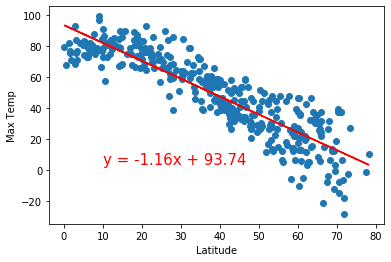

In [11]:
x_values =  north['lat']
y_values =  north['maxtemp']
func.LinearRegression(x_values,y_values,'Latitude','Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

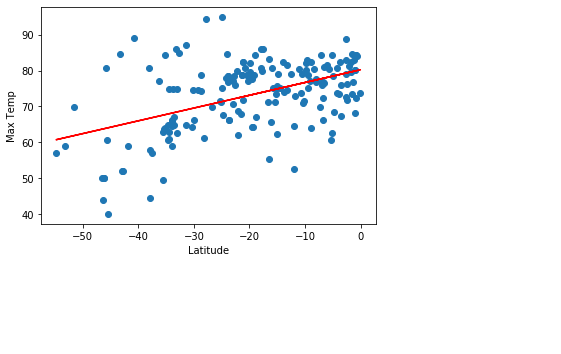

In [12]:
x_values =  south['lat']
y_values =  south['maxtemp']
func.LinearRegression(x_values,y_values,'Latitude','Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

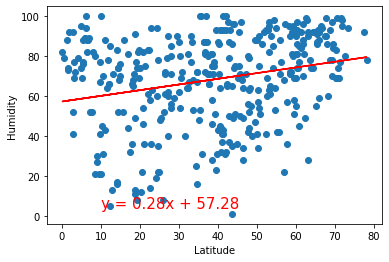

In [13]:
x_values =  north['lat']
y_values =  north['humidity']
func.LinearRegression(x_values,y_values,'Latitude','Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

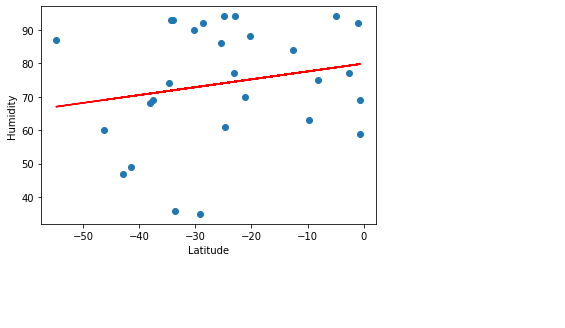

In [109]:
x_values =  south['lat']
y_values =  south['humidity']
func.LinearRegression(x_values,y_values,'Latitude','Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

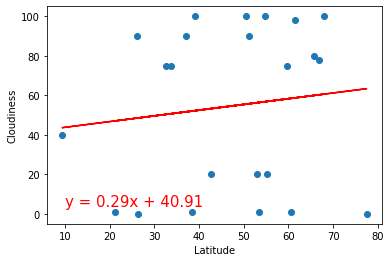

In [110]:
x_values =  north['lat']
y_values =  north['cloud']
func.LinearRegression(x_values,y_values,'Latitude','Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

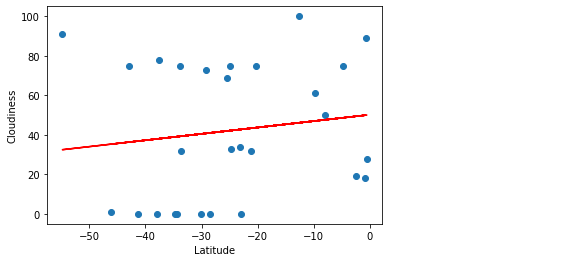

In [111]:
x_values =  south['lat']
y_values =  south['cloud']
func.LinearRegression(x_values,y_values,'Latitude','Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

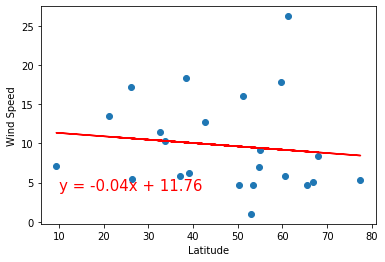

In [112]:
x_values =  north['lat']
y_values =  north['windspeed']
func.LinearRegression(x_values,y_values,'Latitude','Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

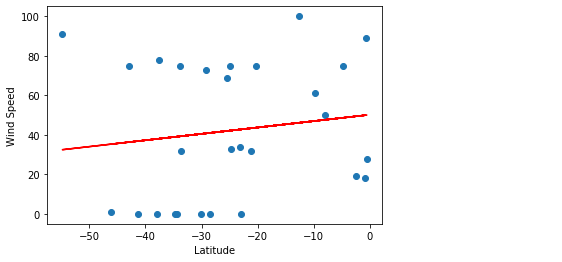

In [113]:
x_values =  south['lat']
y_values =  south['cloud']
func.LinearRegression(x_values,y_values,'Latitude','Wind Speed')